# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t', decimal = '.')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


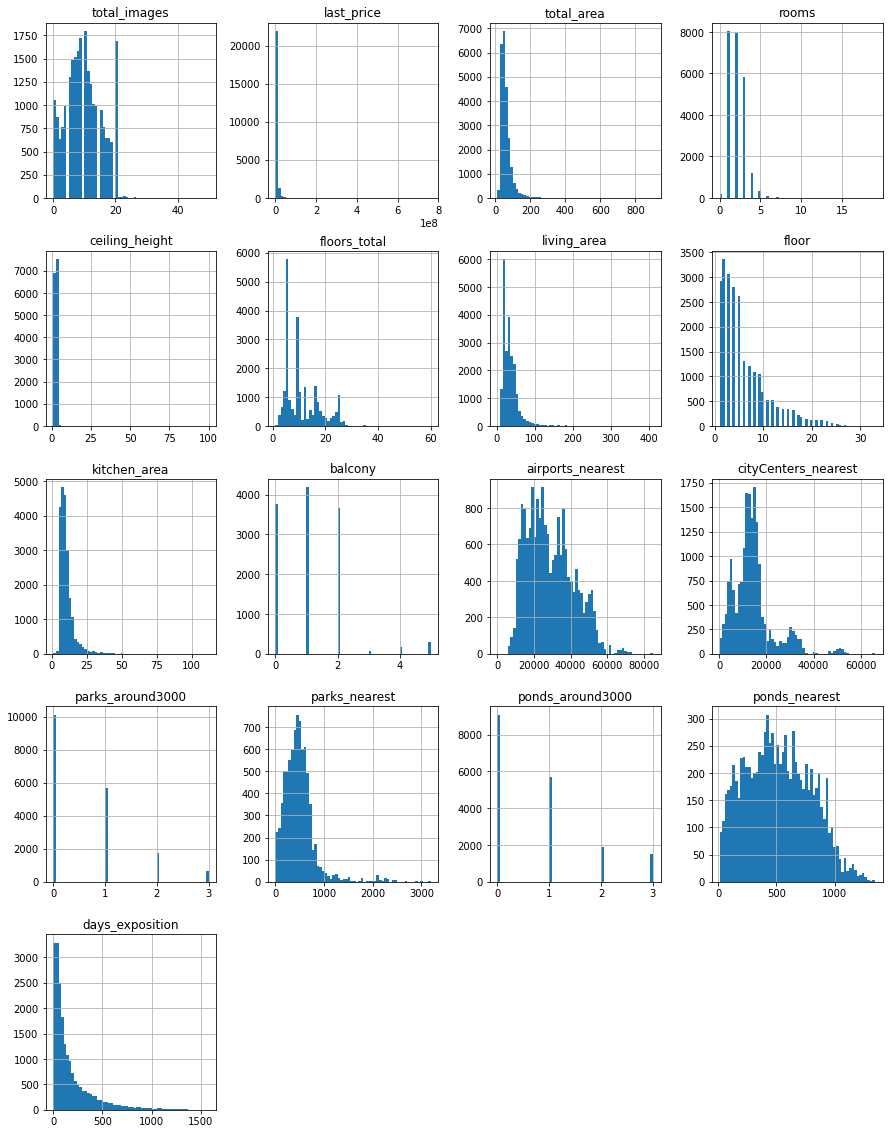

In [29]:
#Выведем гистограммы по всем столбцам. Далее, после дработки, более подробно остановимся на каждом
data.hist(figsize = (15,20), bins = 60)
plt.show()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Предобработка данных

После применения метода `info` видим, что необходимо изменить типы в следующих столбцах:
 - first_day_exposition - заменить на `datetime`
 - is_apartment - заменить на `bool`

In [3]:
#меняем формат на `datetime`
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [ ]:
#меням формат на "bool"
data['is_apartment'] = data['is_apartment'].astype('bool')

In [ ]:
#меняем формат на int, т.к. комнат может быть толькое целое число
data['rooms'] = data['rooms'].astype(int)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  float64
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  float64
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21798 non-null  float64
 8   floor                 23699 non-null  float64
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  object 
 11  open_plan             23699 non-null  object 
 12  kitchen_area          21429 non-null  float64
 13  balcony               12193 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [50]:
#меняем формат на int, т.к. этажей может быть толькое целое число
data['floor'] = data['floor'].astype(int)

In [51]:
#меняем формат на `bool`
data['is_apartment'] = data['is_apartment'].astype(bool)

In [52]:
#меняем формат на `bool`
data['studio'] = data['studio'].astype(bool)

In [53]:
#меняем формат на `bool`
data['open_plan'] = data['open_plan'].astype(bool)

In [54]:
#меняем формат на int, т.к. парков может быть толькое целое число. Предположим, что отсутствие значения - это отсутсвие парков.

data['ponds_around3000'] = pd.to_numeric(data['ponds_around3000'])
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

In [55]:
#меняем формат на int, т.к. парков может быть толькое целое число. Предположим, что отсутствие значения - это отсутсвие парков.

data['ponds_nearest'] = pd.to_numeric(data['ponds_nearest'])
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].astype(int)

In [56]:
#проверяем измененные типы заничей по столбцам
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  float64
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  float64
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21798 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21429 non-null  float64
 13  balcony               12193 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [57]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,0.000000


#### Столбец `ceiling_height`

In [58]:
#Смотрим столбцы с пропусками, смотрим уникальные значения и думаем чем их можно заменить.
data['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       4.15, 3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 ,
       3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66,
       2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16,
       3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 2.79, 2.95, 4.06, 2.94,
       3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 3.65, 3.9 , 3.18,
       3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95,
       3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 , 4.5 ,
       4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81, 3.44,
       2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46, 3.47, 3.33,
       3.63, 3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45, 3.84, 3.23,
       3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31, 4.65, 3.56, 2.2 ,
       3.51, 3.93, 3.42, 2.99, 3.49, 4.14, 2.91, 3.

In [59]:
#Примем 5 метров за максимальную возможную высотку потолка, а 2 за минимальную
#сначала заменим возможные техические опечатки:
data.loc[data['ceiling_height'] == 25] = 2.5
data.loc[data['ceiling_height'] == 100] = 2.5
data.loc[data['ceiling_height'] == 5.2] = 2.5
data.loc[data['ceiling_height'] == 32] = 3.2
data.loc[data['ceiling_height'] == 27] = 2.7
data.loc[data['ceiling_height'] == 26] = 2.6
data.loc[data['ceiling_height'] == 22.6] = 2.6
data.loc[data['ceiling_height'] == 27.5] = 2.75
data.loc[data['ceiling_height'] == 24] = 2.4
data.loc[data['ceiling_height'] == 20] = 2.0

# заменим медианным значением аномально высокие и аномально низкие значения:
data.loc[data['ceiling_height'] == 10.3] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] == 1] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] == 14] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] == 8] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] == 5] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] == 5.6] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] == 8.3] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] == 1.2] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] == 5.5] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] == 6] = data['ceiling_height'].median()


In [60]:
data['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       4.15, 3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 ,
       3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66,
       2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16,
       3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 2.79, 2.95, 4.06, 2.94,
       3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 3.65, 3.9 , 3.18,
       3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95,
       3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 , 4.5 ,
       4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81, 3.44,
       2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46, 3.47, 3.33,
       3.63, 3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45, 3.84, 3.23,
       3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31, 4.65, 3.56, 2.2 ,
       3.51, 3.93, 3.42, 2.99, 3.49, 4.14, 2.91, 3.

In [61]:
#заменим пустые значения медианным значением высоты потолка соответсвующего района
#for locality in data['locality_name'].unique():
    #median = data.loc[data['locality_name'] == locality, 'ceiling_height'].median()
   # data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality), 'ceiling_height'] = median
#прочие заменим медианой
#data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

In [1]:
data.loc[data['locality_name'] == locality, 'ceiling_height'].median()

In [63]:
#проверим пропуски
data['ceiling_height'].isna().sum()

9195

#### Столбец `floors_total`

In [64]:
#посмотрим на уникальные значения в столбце floors_total:
data['floors_total'].unique()

array([16.  , 11.  ,  5.  , 14.  , 12.  , 26.  , 24.  , 27.  ,  9.  ,
        6.  , 17.  , 25.  ,  3.  , 23.  , 19.  , 18.  ,  4.  , 22.  ,
        8.  ,  2.  , 10.  ,  7.  , 13.  , 15.  ,   nan, 20.  , 28.  ,
        2.5 , 36.  , 21.  , 35.  ,  2.65, 34.  , 60.  ,  1.  ,  3.2 ,
       29.  ,  2.7 ,  2.4 ,  2.6 , 33.  , 52.  , 37.  ,  2.75])

In [65]:
#сомнительные дробные этажи выведем на экран и посмотрим, что во всех столбцах стоит одно и то же значение.
floors_bad = [22.5, 3.5, 2.65, 3.2, 2.7, 2.5, 2.4, 2.6, 2.75]
data_floors_bad = data.query('floors_total == @floors_bad')
data_floors_bad.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,2.50,2.50,2.50,2.5,2.50,2.50,2.50,2.50,2.0,True,...,2.50,2.50,2.5,2.50,2.50,2.50,2.50,2.0,2.0,2.50
464,2.50,2.50,2.50,2.5,2.50,2.50,2.50,2.50,2.0,True,...,2.50,2.50,2.5,2.50,2.50,2.50,2.50,2.0,2.0,2.50
1053,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.0,True,...,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.0,2.0,2.65
1388,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.0,True,...,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.0,2.0,2.65
3148,3.20,3.20,3.20,3.2,3.20,3.20,3.20,3.20,3.0,True,...,3.20,3.20,3.2,3.20,3.20,3.20,3.20,3.0,3.0,3.20
3474,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.0,True,...,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.0,2.0,2.65
4643,2.50,2.50,2.50,2.5,2.50,2.50,2.50,2.50,2.0,True,...,2.50,2.50,2.5,2.50,2.50,2.50,2.50,2.0,2.0,2.50
4876,2.70,2.70,2.70,2.7,2.70,2.70,2.70,2.70,2.0,True,...,2.70,2.70,2.7,2.70,2.70,2.70,2.70,2.0,2.0,2.70
5076,2.40,2.40,2.40,2.4,2.40,2.40,2.40,2.40,2.0,True,...,2.40,2.40,2.4,2.40,2.40,2.40,2.40,2.0,2.0,2.40
5246,2.70,2.70,2.70,2.7,2.70,2.70,2.70,2.70,2.0,True,...,2.70,2.70,2.7,2.70,2.70,2.70,2.70,2.0,2.0,2.70


In [66]:
# примем вышеуказанные значения за ошибки и удалим. Пропуски оставим, т.к. узнать этаж нет возможности.
data = data.query('floors_total != @floors_bad')

In [67]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

#### Столбец `living_area`

In [68]:
#посмотрим на значения в столбце living_area:
data['living_area'].describe()

count    21763.000000
mean        34.447496
std         22.010328
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [69]:
#Посмотрев методами describe на максмиальное и минимальные значения нашли что квартиры с 2 кв.м. не существует, это тоже ошибка данных. Удалим ее
data = data.query('living_area != 2')

#### Столбец `kitchen_area`

In [70]:
#Посмотрим на столбец kitchen_area:
data['kitchen_area'].describe()
#в целом никаких отколнений нет. пропуски также не стоит заполнять, т.к. плоащдь кухни ни от чего не зависит

count    21392.000000
mean        10.570196
std          5.906622
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

#### Столбец `balcony`

In [71]:
#Перейдем к столбцу balcony. Проверим уникальные значения и выведем количество отсутствующих значений
print(data['balcony'].unique())
print(data['balcony'].isna().sum())

[nan  2.  0.  1.  5.  4.  3.]
11504


In [72]:
#Будем считать, что отсутствие значения - это отсутствие балкона и заменим их на ноль
data['balcony'] = data['balcony'].fillna(0)

#### Столбец `locality_name`

In [73]:
#Следующий столбец locality_name
#Заменяем все мешающие сортировке значения, а также заполняем пропуски на `СПб или ЛО`
data['locality_name'] = data['locality_name'].fillna('СПб или ЛО')
data['locality_name'] = data['locality_name'].str.replace('деревня ','')
data['locality_name'] = data['locality_name'].str.replace('посёлок ','')
data['locality_name'] = data['locality_name'].str.replace('городского ','')
data['locality_name'] = data['locality_name'].str.replace('2 ','')
data['locality_name'] = data['locality_name'].str.replace('поселок ','')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество  ','')
data['locality_name'] = data['locality_name'].str.replace('городской ','')
data['locality_name'] = data['locality_name'].str.replace('станции ','')
data['locality_name'] = data['locality_name'].str.replace('имени ','')
data['locality_name'] = data['locality_name'].str.replace('адоводческое некоммерческое товарищество ','')
data['locality_name'] = data['locality_name'].str.replace('село ','')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ','')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции ','')
data['locality_name'] = data['locality_name'].str.replace('коттеджный ','')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной ','')
data['locality_name'] = data['locality_name'].str.replace('сЛесная Поляна','Лесная Поляна')
data['locality_name'] = data['locality_name'].str.replace('типа ','')

In [74]:
#Пропишем функцию на случай если название населенного пунтка написано по-разному. В итоге не пригодилась.
def name_change (name):
    if 'Санкт' in name:
        return 'Санкт-Петербург'
    if 'Шуша' in name:
        return 'Шушары' 
    else:
        return name

In [75]:
#применим функцю и проверим результат
data['locality_name'].apply(name_change)
data['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

#### Столбец `airports_nearest`

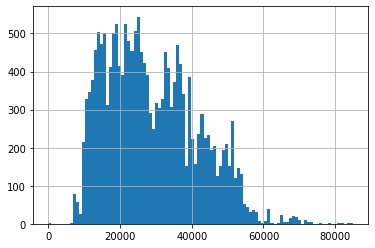

In [76]:
#Следующий столбец 'airports_nearest'
data['airports_nearest'].hist(bins = 100)
plt.show()

In [77]:
#Заменим нулевое значение на следующее минимальное значение - 6450, поскольку в аэропорту запрещено размещение жилой недвижимости
data['airports_nearest'] = data['airports_nearest'].replace(0,6450)
#Отсутствующие значения оставляем, т.к. не знаем данных о расстоянии 

#### Столбец `cityCenters_nearest`

In [78]:
#Следующий столбец 'cityCenters_nearest'
data['cityCenters_nearest'].describe()
#Отсутствующие значения оставляем, т.к. не знаем данных о расстоянии 

count    18155.000000
mean     14193.466318
std       8607.059504
min        181.000000
25%       9238.000000
50%      13101.000000
75%      16293.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

#### Столбец `parks_around3000`

In [79]:
#Следующий столбец 'parks_around3000'
data['parks_around3000'].describe()
#Отсутствующие значения оставляем, т.к. не знаем данных

count    18156.000000
mean         0.610872
std          0.801466
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

#### Столбец `ponds_nearest`

In [80]:
#Следующий столбец 'ponds_nearest'
data['ponds_nearest'].describe()
#Отсутствующие значения оставляем, т.к. не знаем данных

count    23661.000000
mean       199.183974
std        305.256451
min          0.000000
25%          0.000000
50%          0.000000
75%        389.000000
max       1344.000000
Name: ponds_nearest, dtype: float64

#### Столбец `days_exposition`

In [81]:
#Следующий столбец 'days_exposition'
data['days_exposition'].describe()
#Отсутствующие значения оставляем, т.к. не знаем данных

count    20487.000000
mean       180.879777
std        219.761008
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [82]:
#Проверим данные на дубликаты

data.duplicated().sum()

#По сути - дубликаты могут быть только в столбце - `locality_name`, но это объяснимо, так что там их не трогаем, по остальным столбцам - там формат либо дата либо число, там тоже нечего проверять.

0

In [83]:
#Прочерим столбец название населенного пункта отсортировав по уникальным значениям (для достоверности приведем все к нижнему регистру). Повторов не наблюдается. 

data['locality_name'].str.lower().sort_values().unique()

array(['агалатово', 'александровская', 'алексеевка', 'аннино', 'аро',
       'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров',
       'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь',
       'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'вещево',
       'виллози', 'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево',
       'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово',
       'дзержинского', 'дружная горка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жилгородок', 'жилпосёлок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зимитицы', 'ивангород', 'извара'

### Посчитайте и добавьте в таблицу новые столбцы

In [84]:
#Переведем еще раз в формат дата-вермя, т.к. ячейка иногда не срабатывает. Техничсекая ячейка.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [85]:
#столбец ставки на 1 кв.м.
data['price_per_sq_metr'] = pd.Series(data['last_price']/data['total_area']).round(2)

In [86]:
#столбец день недели 0 - понедельник
data['fde_day_of_the_week'] = data['first_day_exposition'].dt.weekday

In [87]:
#столбец номер месяца
data['fde_month'] = data['first_day_exposition'].dt.month

In [88]:
#столбец номер года
data['fde_year'] = data['first_day_exposition'].dt.year

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23661 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23661 non-null  float64       
 1   last_price            23661 non-null  float64       
 2   total_area            23661 non-null  float64       
 3   first_day_exposition  23661 non-null  datetime64[ns]
 4   rooms                 23661 non-null  float64       
 5   ceiling_height        14467 non-null  float64       
 6   floors_total          23575 non-null  float64       
 7   living_area           21760 non-null  float64       
 8   floor                 23661 non-null  float64       
 9   is_apartment          23661 non-null  object        
 10  studio                23661 non-null  object        
 11  open_plan             23661 non-null  object        
 12  kitchen_area          21392 non-null  float64       
 13  balcony         

In [89]:
#столбец тип этажа (1- первый)
def floor_position (data):
    floor_number = data['floor']
    floor_total = data['floors_total']
    if floor_number == 1:
        return 'первый'
    elif floor_number == floor_total:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_position, axis = 1)

In [90]:
#столбец расстояние до центра в км
data['to_center_km'] = pd.Series(data['cityCenters_nearest']/1000).round(0)


### Проведите исследовательский анализ данных

#### Анализ столбца `total_area`

count    23661.000000
mean        60.329833
std         35.563333
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


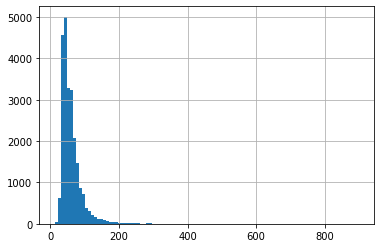

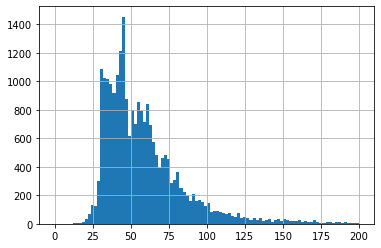

In [91]:
#Выведем данные по столбцу 'total_area'
print(data['total_area'].describe())

data['total_area'].hist(bins=100)
plt.show()

data['total_area'].hist(bins=100, range = (0,200))
plt.show()


In [92]:
data[data['total_area']<15]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_metr,fde_day_of_the_week,fde_month,fde_year,floor_type,to_center_km
17961,3.0,1400000.0,13.0,2017-12-03,1.0,2.60,9.0,NaN,1.0,True,...,NaN,1.0,185.0,410.0,107692.31,6,12,2017,первый,16.0
19546,3.0,1850000.0,13.0,2019-03-11,1.0,3.40,5.0,NaN,2.0,False,...,644.0,0.0,0.0,24.0,142307.69,0,3,2019,другой,5.0
19558,2.0,1686000.0,13.2,2018-12-17,1.0,NaN,5.0,NaN,1.0,True,...,361.0,1.0,155.0,19.0,127727.27,0,12,2018,первый,4.0
19642,5.0,1190000.0,14.0,2018-07-29,1.0,NaN,5.0,11.0,1.0,True,...,NaN,0.0,0.0,4.0,85000.00,6,7,2018,первый,11.0
19807,0.0,3800000.0,13.0,2018-07-04,1.0,NaN,5.0,10.0,3.0,True,...,592.0,3.0,27.0,9.0,292307.69,2,7,2018,другой,1.0
19904,4.0,2400000.0,12.0,2017-07-19,1.0,2.55,5.0,10.0,2.0,True,...,886.0,2.0,45.0,200.0,200000.00,2,7,2017,другой,1.0


In [93]:
data[data['total_area']>500]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_metr,fde_day_of_the_week,fde_month,fde_year,floor_type,to_center_km
3117,19.0,140000000.0,631.0,2019-03-30,7.0,NaN,5.0,NaN,5.0,True,...,NaN,2.0,210.0,NaN,221870.05,5,3,2019,последний,5.0
4237,1.0,50000000.0,517.0,2017-10-14,7.0,NaN,4.0,332.0,3.0,True,...,477.0,2.0,540.0,NaN,96711.80,5,10,2017,другой,2.0
5358,20.0,65000000.0,590.0,2019-02-14,15.0,3.50,6.0,409.0,3.0,True,...,767.0,0.0,0.0,14.0,110169.49,3,2,2019,другой,5.0
8018,20.0,84000000.0,507.0,2015-12-17,5.0,4.45,7.0,301.5,7.0,True,...,110.0,0.0,0.0,1078.0,165680.47,3,12,2015,последний,6.0
12859,20.0,140000000.0,631.2,2019-04-09,7.0,3.90,4.0,322.3,4.0,True,...,NaN,2.0,210.0,NaN,221799.75,1,4,2019,последний,5.0
15651,20.0,300000000.0,618.0,2017-12-18,7.0,3.40,7.0,258.0,5.0,True,...,NaN,2.0,198.0,111.0,485436.89,0,12,2017,другой,5.0
19540,8.0,420000000.0,900.0,2017-12-06,12.0,2.80,25.0,409.7,25.0,True,...,NaN,2.0,318.0,106.0,466666.67,2,12,2017,последний,8.0


**Вывод по столбцу 'total_area':** Основаная масса недвижимости - до 100 кв.м.. Видим редкие значения, достигающие более 500 кв.м. Минмальные значение менее 12 кв.м. объяснимо - скорее всего это студии.  

#### Анализ столбца `living_area`

count    21760.000000
mean        34.451969
std         22.008547
min          3.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


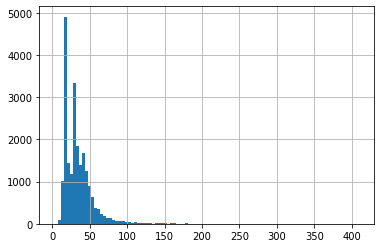

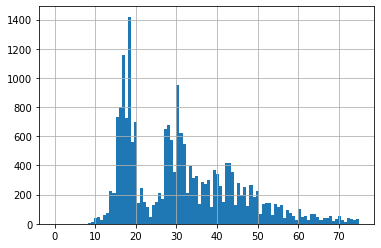

In [94]:
#Выведем данные по столбцу 'living_area'
print(data['living_area'].describe())

data['living_area'].hist(bins=100)
plt.show()

data['living_area'].hist(bins=100, range = (0,75))
plt.show()


In [95]:
data[data['living_area']<10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_metr,fde_day_of_the_week,fde_month,fde_year,floor_type,to_center_km
114,5.0,4000000.0,21.40,2019-02-07,1.0,2.90,8.0,8.3,7.0,True,...,488.0,1.0,286.0,NaN,186915.89,3,2,2019,другой,6.0
680,14.0,7200000.0,43.00,2017-10-31,1.0,NaN,8.0,9.0,2.0,True,...,2137.0,1.0,933.0,296.0,167441.86,1,10,2017,другой,5.0
1326,8.0,8100000.0,52.00,2017-01-29,2.0,2.70,25.0,9.0,15.0,True,...,NaN,1.0,1180.0,337.0,155769.23,6,1,2017,другой,16.0
2309,10.0,4200000.0,62.40,2017-06-15,2.0,2.60,9.0,8.4,6.0,True,...,NaN,0.0,0.0,111.0,67307.69,3,6,2017,другой,29.0
3242,7.0,4440000.0,41.00,2017-07-02,1.0,NaN,17.0,3.0,17.0,True,...,NaN,0.0,0.0,216.0,108292.68,6,7,2017,последний,13.0
4100,17.0,5300000.0,34.80,2017-06-19,1.0,2.70,23.0,9.0,15.0,True,...,NaN,0.0,0.0,30.0,152298.85,0,6,2017,другой,13.0
4542,12.0,3300000.0,18.00,2018-11-07,1.0,3.50,5.0,9.0,2.0,True,...,349.0,1.0,963.0,9.0,183333.33,2,11,2018,другой,5.0
7312,8.0,3400000.0,27.00,2018-02-21,2.0,2.50,15.0,9.0,4.0,True,...,617.0,0.0,0.0,NaN,125925.93,2,2,2018,другой,16.0
8325,9.0,4800000.0,52.00,2017-10-25,2.0,NaN,5.0,9.0,2.0,True,...,NaN,2.0,118.0,119.0,92307.69,2,10,2017,другой,13.0
15833,20.0,4600000.0,33.00,2017-01-01,1.0,2.70,22.0,9.0,12.0,True,...,NaN,0.0,0.0,511.0,139393.94,6,1,2017,другой,14.0


In [96]:
data[data['living_area']>300]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_metr,fde_day_of_the_week,fde_month,fde_year,floor_type,to_center_km
660,3.0,49950000.0,483.9,2017-10-04,7.0,3.20,6.0,312.5,4.0,True,...,461.0,3.0,22.0,391.0,103223.81,2,10,2017,другой,1.0
4237,1.0,50000000.0,517.0,2017-10-14,7.0,NaN,4.0,332.0,3.0,True,...,477.0,2.0,540.0,NaN,96711.80,5,10,2017,другой,2.0
5358,20.0,65000000.0,590.0,2019-02-14,15.0,3.50,6.0,409.0,3.0,True,...,767.0,0.0,0.0,14.0,110169.49,3,2,2019,другой,5.0
8018,20.0,84000000.0,507.0,2015-12-17,5.0,4.45,7.0,301.5,7.0,True,...,110.0,0.0,0.0,1078.0,165680.47,3,12,2015,последний,6.0
12401,20.0,91500000.0,495.0,2017-06-19,7.0,4.65,7.0,347.5,7.0,True,...,110.0,0.0,0.0,14.0,184848.48,0,6,2017,последний,6.0
12859,20.0,140000000.0,631.2,2019-04-09,7.0,3.90,4.0,322.3,4.0,True,...,NaN,2.0,210.0,NaN,221799.75,1,4,2019,последний,5.0
19540,8.0,420000000.0,900.0,2017-12-06,12.0,2.80,25.0,409.7,25.0,True,...,NaN,2.0,318.0,106.0,466666.67,2,12,2017,последний,8.0


In [97]:
percentage = len(data[data['living_area']<10]) / len(data['living_area'])
'{:.3%}'.format(percentage)

'0.097%'

**Вывод по столбцу: 'living_area':** мы видим два основных пика на гистограмме: первый в районе 15-20 к.в.м и второй, чуть меньше - в районе 28-32 кв.м. Наиболее низкие значения в районе менее 10 кв.м. порой выглядят неправдоподобно, т.к. общая площадь в десятки раз превышает жилую. Считаю что такие значения ни чем не заменить и стоит оставить, т.к. их доля составляет менее 0,1 %.

#### Анализ столбца `kitchen_area`

count    21392.000000
mean        10.570196
std          5.906622
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


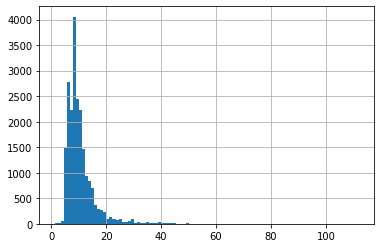

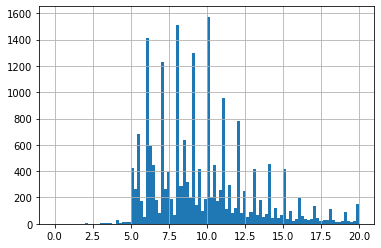

In [98]:
#Выведем данные по столбцу 'kitchen_area'
print(data['kitchen_area'].describe())

data['kitchen_area'].hist(bins=100)
plt.show()

data['kitchen_area'].hist(bins=100, range = (0,20))
plt.show()


In [99]:
data[data['kitchen_area']<3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_metr,fde_day_of_the_week,fde_month,fde_year,floor_type,to_center_km
906,15.0,2600000.0,27.00,2017-07-10,1.0,2.75,23.0,18.0,18.0,True,...,NaN,1.0,411.0,10.0,96296.30,0,7,2017,другой,17.0
6262,9.0,3100000.0,24.00,2018-06-25,2.0,3.00,5.0,16.0,5.0,True,...,426.0,1.0,936.0,54.0,129166.67,0,6,2018,последний,5.0
7950,3.0,5967734.0,66.40,2017-02-07,2.0,NaN,4.0,44.4,2.0,False,...,NaN,0.0,0.0,335.0,89875.51,1,2,2017,другой,21.0
8729,9.0,2200000.0,18.40,2018-08-20,1.0,2.52,3.0,14.0,3.0,True,...,NaN,1.0,155.0,59.0,119565.22,0,8,2018,последний,31.0
9138,17.0,2920000.0,23.29,2018-12-12,1.0,NaN,3.0,21.0,1.0,True,...,NaN,2.0,45.0,107.0,125375.70,2,12,2018,первый,4.0
11033,6.0,5350000.0,32.00,2016-04-20,1.0,NaN,14.0,16.0,10.0,True,...,NaN,1.0,69.0,210.0,167187.50,2,4,2016,другой,4.0
16367,2.0,2720000.0,25.70,2017-10-30,1.0,NaN,19.0,22.6,11.0,True,...,NaN,0.0,0.0,109.0,105836.58,0,10,2017,другой,13.0
17834,5.0,2940000.0,34.70,2017-10-09,1.0,NaN,26.0,15.5,14.0,True,...,NaN,0.0,0.0,318.0,84726.22,0,10,2017,другой,NaN
19642,5.0,1190000.0,14.00,2018-07-29,1.0,NaN,5.0,11.0,1.0,True,...,NaN,0.0,0.0,4.0,85000.00,6,7,2018,первый,11.0
20217,7.0,4250000.0,28.50,2019-05-01,1.0,2.80,14.0,19.5,10.0,True,...,NaN,0.0,0.0,NaN,149122.81,2,5,2019,другой,13.0


In [100]:
data[data['kitchen_area']>70]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_metr,fde_day_of_the_week,fde_month,fde_year,floor_type,to_center_km
492,18.0,95000000.0,216.0,2017-12-05,4.0,3.0,5.0,86.0,4.0,True,...,138.0,3.0,620.0,14.0,439814.81,1,12,2017,другой,0.0
2489,9.0,12500000.0,255.0,2017-04-21,3.0,NaN,2.0,153.9,2.0,True,...,NaN,3.0,198.0,102.0,49019.61,4,4,2017,последний,7.0
4394,20.0,57000000.0,174.0,2015-11-09,3.0,3.2,10.0,95.0,6.0,True,...,193.0,3.0,199.0,1039.0,327586.21,0,11,2015,другой,4.0
5358,20.0,65000000.0,590.0,2019-02-14,15.0,3.5,6.0,409.0,3.0,True,...,767.0,0.0,0.0,14.0,110169.49,3,2,2019,другой,5.0
10867,1.0,56844500.0,177.9,2015-01-15,3.0,NaN,6.0,87.2,5.0,True,...,160.0,3.0,569.0,NaN,319530.64,3,1,2015,другой,0.0
14644,17.0,47000000.0,150.0,2017-02-28,4.0,3.7,6.0,58.0,5.0,True,...,NaN,0.0,0.0,507.0,313333.33,1,2,2017,другой,8.0
16239,5.0,82400000.0,181.1,2017-05-24,3.0,3.9,9.0,58.2,4.0,False,...,116.0,0.0,0.0,501.0,454997.24,2,5,2017,другой,6.0
16647,15.0,122000000.0,145.0,2017-04-25,3.0,3.3,6.0,36.0,2.0,True,...,478.0,3.0,250.0,335.0,841379.31,1,4,2017,другой,7.0
16797,9.0,65850000.0,146.0,2017-07-14,2.0,NaN,9.0,40.0,3.0,True,...,116.0,0.0,0.0,77.0,451027.40,4,7,2017,другой,6.0
19540,8.0,420000000.0,900.0,2017-12-06,12.0,2.8,25.0,409.7,25.0,True,...,NaN,2.0,318.0,106.0,466666.67,2,12,2017,последний,8.0


**Вывод по столбцу 'kitchen_area':** основаня масса данных находится в диапазоне от 5 до 12 кв.м. Максимальные и минимальные значения логичны и корректировке не нуждаются.

#### Анализ столбца `last_price`, `last_price_thousand`

In [101]:
#Выведем данные по столбцу 'last_price' и для удобства анализа переведем ее в тысячи, создав новый столбец

#Далее было замечено значение в 12,190 тыс. руб, которое стоит заменить на 12 190 тыс. руб, т.к. это явная опечатка исходя из плоащди квартиры
data['last_price'] = data['last_price'].replace(12190, 12190000)

data['last_price_thousand']=data['last_price']/1000000

In [102]:
print(data['last_price_thousand'].describe())

count    23661.000000
mean         6.533929
std         10.855985
min          0.430000
25%          3.405000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price_thousand, dtype: float64


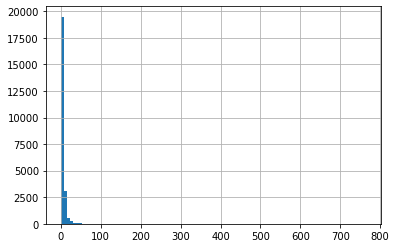

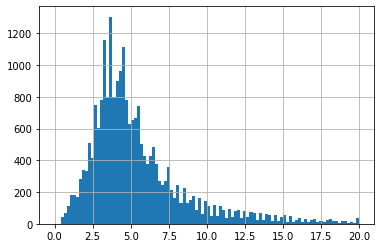

In [103]:
data['last_price_thousand'].hist(bins=100)
plt.show()

data['last_price_thousand'].hist(bins = 100, range = (0, 20))
plt.show()

In [104]:
data[data['last_price_thousand']<5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_metr,fde_day_of_the_week,fde_month,fde_year,floor_type,to_center_km,last_price_thousand
1,7.0,3350000.0,40.40,2018-12-04,1.0,NaN,11.0,18.60,1.0,True,...,0.0,0.0,81.0,82920.79,1,12,2018,первый,19.0,3.35
5,10.0,2890000.0,30.40,2018-09-10,1.0,NaN,12.0,14.40,5.0,True,...,0.0,0.0,55.0,95065.79,0,9,2018,другой,NaN,2.89
6,6.0,3700000.0,37.30,2017-11-02,1.0,NaN,26.0,10.60,6.0,True,...,0.0,0.0,155.0,99195.71,3,11,2017,другой,19.0,3.70
8,20.0,2900000.0,33.16,2018-05-23,1.0,NaN,27.0,15.43,26.0,True,...,0.0,0.0,189.0,87454.76,2,5,2018,другой,NaN,2.90
11,9.0,3300000.0,44.00,2018-08-27,2.0,NaN,5.0,31.00,4.0,False,...,0.0,0.0,7.0,75000.00,0,8,2018,другой,52.0,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2.0,1350000.0,30.00,2017-07-07,1.0,NaN,5.0,17.50,4.0,True,...,0.0,0.0,413.0,45000.00,4,7,2017,другой,NaN,1.35
23693,9.0,4600000.0,62.40,2016-08-05,3.0,2.6,9.0,40.00,8.0,True,...,1.0,675.0,239.0,73717.95,4,8,2016,другой,34.0,4.60
23695,14.0,3100000.0,59.00,2018-01-15,3.0,NaN,5.0,38.00,4.0,True,...,0.0,0.0,45.0,52542.37,0,1,2018,другой,NaN,3.10
23696,18.0,2500000.0,56.70,2018-02-11,2.0,NaN,3.0,29.70,1.0,True,...,0.0,0.0,NaN,44091.71,6,2,2018,первый,NaN,2.50


In [105]:
data[data['last_price_thousand']>100]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_metr,fde_day_of_the_week,fde_month,fde_year,floor_type,to_center_km,last_price_thousand
793,20.0,135000000.0,310.0,2018-05-22,4.0,3.30,5.0,250.00,2.0,True,...,3.0,190.0,342.0,435483.87,1,5,2018,другой,7.0,135.00000
1026,20.0,155000000.0,310.0,2018-10-12,5.0,5.30,3.0,190.00,3.0,True,...,1.0,603.0,NaN,500000.00,4,10,2018,последний,5.0,155.00000
1188,20.0,118000000.0,290.6,2018-06-01,6.0,3.82,6.0,188.70,3.0,True,...,0.0,0.0,316.0,406056.43,4,6,2018,другой,6.0,118.00000
1300,14.0,120000000.0,280.0,2018-07-12,5.0,4.70,4.0,162.00,3.0,True,...,3.0,339.0,225.0,428571.43,3,7,2018,другой,4.0,120.00000
1436,19.0,330000000.0,190.0,2018-04-04,3.0,3.50,7.0,95.00,5.0,True,...,3.0,285.0,233.0,1736842.11,2,4,2018,другой,1.0,330.00000
1928,11.0,125000000.0,224.5,2017-01-24,4.0,NaN,4.0,163.50,3.0,False,...,2.0,497.0,174.0,556792.87,1,1,2017,другой,2.0,125.00000
2243,9.0,130278280.0,304.0,2015-07-24,5.0,3.11,9.0,NaN,7.0,True,...,0.0,0.0,599.0,428546.97,4,7,2015,другой,6.0,130.27828
2536,16.0,159984000.0,242.4,2015-08-27,4.0,3.85,9.0,131.00,7.0,True,...,1.0,227.0,501.0,660000.00,3,8,2015,другой,2.0,159.98400
3117,19.0,140000000.0,631.0,2019-03-30,7.0,NaN,5.0,NaN,5.0,True,...,2.0,210.0,NaN,221870.05,5,3,2019,последний,5.0,140.00000
4996,20.0,124000000.0,124.5,2017-10-12,4.0,3.00,4.0,67.20,2.0,False,...,3.0,172.0,45.0,995983.94,3,10,2017,другой,2.0,124.00000


In [106]:
luxury_percentage = len(data[data['last_price_thousand'] > 100]) / len(data['last_price_thousand'])
'{:.3%}'.format(luxury_percentage)

'0.152%'

**Вывод по столбцу 'last_price_thousand':** Основаная ценовая категория колеблется от 3,5 до 6,8 мил. руб.  Люксовая недвижимость (от 100 мил. руб) составляет 0,15%

#### Анализ столбца `rooms`

count    23661.000000
mean         2.070623
std          1.078158
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


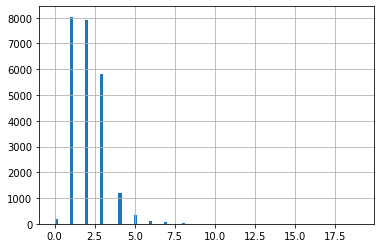

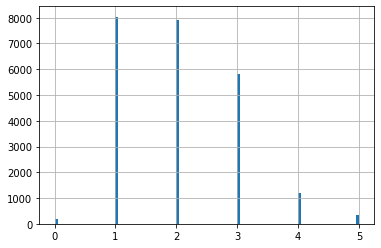

In [107]:
#Выведем данные по столбцу 'rooms'
print(data['rooms'].describe())

data['rooms'].hist(bins=100)
plt.show()

data['rooms'].hist(bins=100, range = (0, 5))
plt.show()


In [108]:
data[data['rooms']==0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_metr,fde_day_of_the_week,fde_month,fde_year,floor_type,to_center_km,last_price_thousand
144,1.0,2450000.0,27.00,2017-03-30,0.0,NaN,24.0,15.50,2.0,True,...,0.0,0.0,181.0,90740.74,3,3,2017,другой,NaN,2.450
349,4.0,2320000.0,25.00,2017-09-27,0.0,NaN,14.0,17.00,1.0,True,...,0.0,0.0,45.0,92800.00,2,9,2017,первый,NaN,2.320
440,8.0,2480000.0,27.11,2018-03-12,0.0,NaN,17.0,24.75,4.0,True,...,2.0,982.0,64.0,91479.16,0,3,2018,другой,15.0,2.480
508,0.0,3375000.0,34.40,2017-03-28,0.0,NaN,26.0,24.30,19.0,True,...,1.0,593.0,430.0,98110.47,1,3,2017,другой,19.0,3.375
608,2.0,1850000.0,25.00,2019-02-20,0.0,NaN,10.0,NaN,7.0,True,...,0.0,0.0,29.0,74000.00,2,2,2019,другой,NaN,1.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7.0,3200000.0,26.00,2017-09-01,0.0,NaN,25.0,18.00,16.0,True,...,1.0,623.0,14.0,123076.92,4,9,2017,другой,13.0,3.200
23442,0.0,2500000.0,27.70,2017-09-28,0.0,NaN,24.0,18.00,4.0,True,...,0.0,0.0,4.0,90252.71,3,9,2017,другой,NaN,2.500
23554,15.0,3350000.0,26.00,2018-09-07,0.0,NaN,19.0,NaN,8.0,True,...,2.0,112.0,31.0,128846.15,4,9,2018,другой,17.0,3.350
23592,10.0,1450000.0,29.00,2017-11-11,0.0,NaN,9.0,18.00,8.0,True,...,0.0,0.0,82.0,50000.00,5,11,2017,другой,NaN,1.450


In [109]:
data[data['rooms']>10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_metr,fde_day_of_the_week,fde_month,fde_year,floor_type,to_center_km,last_price_thousand
648,3.0,17500000.0,183.7,2018-07-01,11.0,3.40,7.0,138.8,7.0,True,...,0.0,0.0,NaN,95264.02,6,7,2018,последний,3.0,17.500
866,5.0,25000000.0,363.0,2017-12-23,14.0,3.16,5.0,222.0,4.0,True,...,2.0,435.0,418.0,68870.52,5,12,2017,другой,8.0,25.000
5358,20.0,65000000.0,590.0,2019-02-14,15.0,3.50,6.0,409.0,3.0,True,...,0.0,0.0,14.0,110169.49,3,2,2019,другой,5.0,65.000
9688,8.0,33000000.0,194.1,2017-02-07,11.0,3.43,5.0,129.0,2.0,True,...,2.0,66.0,813.0,170015.46,1,2,2017,другой,1.0,33.000
14498,6.0,32250000.0,374.6,2018-06-09,19.0,NaN,5.0,264.5,2.0,True,...,2.0,548.0,114.0,86091.83,5,6,2018,другой,4.0,32.250
18848,6.0,28500000.0,270.0,2015-03-02,16.0,3.00,4.0,180.0,4.0,True,...,0.0,0.0,1365.0,105555.56,0,3,2015,последний,4.0,28.500
19540,8.0,420000000.0,900.0,2017-12-06,12.0,2.80,25.0,409.7,25.0,True,...,2.0,318.0,106.0,466666.67,2,12,2017,последний,8.0,420.000
20829,6.0,28659000.0,245.4,2016-03-31,14.0,NaN,4.0,168.3,2.0,True,...,2.0,118.0,95.0,116784.84,3,3,2016,другой,2.0,28.659


**Вывод по столбцу 'rooms':** В целом данные выглядят достоверно. Нет дробных значений. В соновном это 1-3 комнатные объекты недвижимости. Нулоевое значение примем за свободную планировку или студию

#### Анализ столбца `ceiling_height`

count    14467.000000
mean         2.725763
std          0.274117
min          1.750000
25%          2.510000
50%          2.650000
75%          2.800000
max          5.800000
Name: ceiling_height, dtype: float64


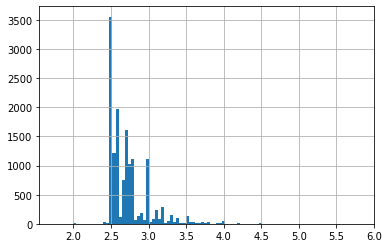

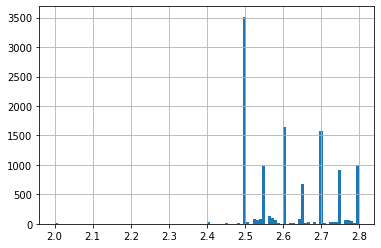

In [110]:
#Выведем данные по столбцу 'ceiling_height '
print(data['ceiling_height'].describe())

data['ceiling_height'].hist(bins=100)
plt.show()

data['ceiling_height'].hist(bins=100, range = (2,2.8))
plt.show()

**Вывод по столбцу 'ceiling_height':** Основаня масса составляет 2,6 - 2,7 метров высотой. Аномальных значения убраны на этапе предоработки.

#### Анализ столбца `floor`

count    23661.000000
mean         5.892397
std          4.884170
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


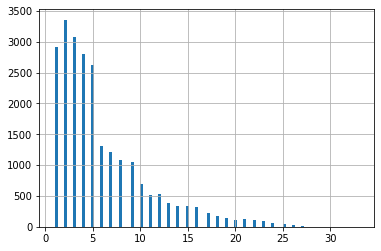

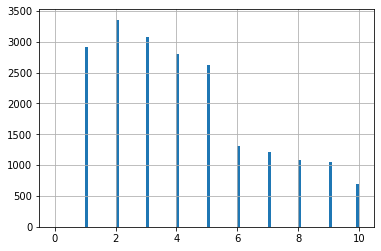

In [111]:
#Выведем данные по столбцу 'floor'
print(data['floor'].describe())

data['floor'].hist(bins=100)
plt.show()

data['floor'].hist(bins=100, range = (0,10))
plt.show()

**Вывод по столбцу 'floor':** Основаня масса данных находится в диапазоне от 2 до 8, как видно по методу describe(). 

#### Анализ столбца `floor_type`

count      23661
unique         3
top       другой
freq       17419
Name: floor_type, dtype: object


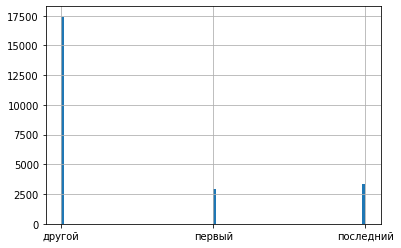

In [112]:
#Выведем данные по столбцу 'floor_type'
print(data['floor_type'].describe())

data['floor_type'].hist(bins=100)
plt.show()


**Вывод по столбцу 'floor_type':** менее всего квартир продается на первом и последних этажах. Наиболее популярные - средние этажи

#### Анализ столбца `floors_total`

count    23575.000000
mean        10.675928
std          6.595257
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


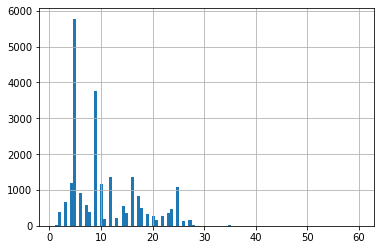

In [113]:
#Выведем данные по столбцу 'floors_total'
print(data['floors_total'].describe())

data['floors_total'].hist(bins=100)
plt.show()

In [114]:
data[data['floors_total']>35]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_metr,fde_day_of_the_week,fde_month,fde_year,floor_type,to_center_km,last_price_thousand
397,15.0,5990000.0,54.0,2018-03-22,2.0,NaN,36.0,21.4,28.0,True,...,3.0,80.0,11.0,110925.93,3,3,2018,другой,20.0,5.990
2253,12.0,3800000.0,45.5,2018-06-28,2.0,2.88,60.0,27.4,4.0,True,...,3.0,614.0,166.0,83516.48,3,6,2018,другой,49.0,3.800
11079,16.0,9200000.0,75.0,2019-02-22,2.0,2.70,36.0,40.0,29.0,True,...,3.0,80.0,NaN,122666.67,4,2,2019,другой,20.0,9.200
16731,9.0,3978000.0,40.0,2018-09-24,1.0,2.65,52.0,10.5,18.0,True,...,0.0,0.0,45.0,99450.00,0,9,2018,другой,13.0,3.978
16934,5.0,4100000.0,40.0,2017-10-17,1.0,1.75,37.0,17.4,5.0,True,...,3.0,80.0,71.0,102500.00,1,10,2017,другой,20.0,4.100


**Вывод по столбцу:'floors_total':** В основном предлагаются к продаже квартиры в домах от 5 до 16 этажей. Также присутсвуют два дома в 52 и 60 этажей.

#### Анализ столбца `cityCenters_nearest`

count    18155.000000
mean     14193.466318
std       8607.059504
min        181.000000
25%       9238.000000
50%      13101.000000
75%      16293.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


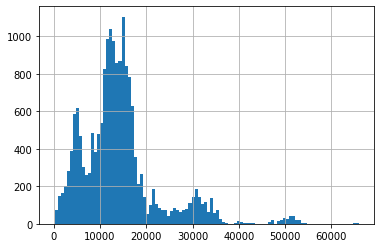

In [115]:
#Выведем данные по столбцу 'cityCenters_nearest '
print(data['cityCenters_nearest'].describe())

data['cityCenters_nearest'].hist(bins=100)
plt.show()

**Вывод по столбцу 'cityCenters_nearest':** Наибольшее количество объявлений приходится на дома, расположенный в пределах от 9 до 16 км. от центра города

#### Анализ столбца `airports_nearest`

count    18132.000000
mean     28795.688286
std      12630.976911
min       6450.000000
25%      18582.000000
50%      26726.000000
75%      37284.000000
max      84869.000000
Name: airports_nearest, dtype: float64


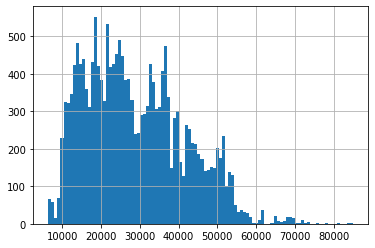

In [116]:
#Выведем данные по столбцу 'airports_nearest'
print(data['airports_nearest'].describe())

data['airports_nearest'].hist(bins=100)
plt.show()

**Вывод по столбцу 'airports_nearest':** Чаще всего предлагаются к продаже квартиры в удалении от аэропррта (18-40 км)

#### Анализ столбца `parks_nearest`

count    8065.000000
mean      490.880099
std       342.491461
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


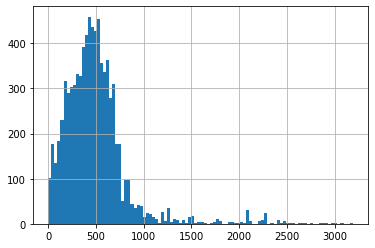

In [117]:
#Выведем данные по столбцу 'parks_nearest'
print(data['parks_nearest'].describe())

data['parks_nearest'].hist(bins=100)
plt.show()

**Вывод по столбцу 'parks_nearest':** практически все объекты имеют парк в пешей доступности (менее 1 км.)

#### Анализ столбца `fde_day_of_the_week`

count    23661.000000
mean         2.569883
std          1.789323
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: fde_day_of_the_week, dtype: float64


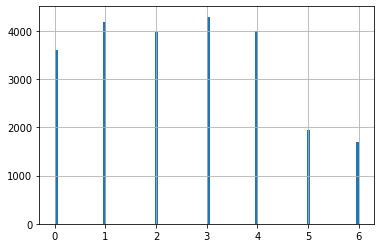

In [118]:
#Выведем данные по столбцу 'fde_day_of_the_week'
print(data['fde_day_of_the_week'].describe())

data['fde_day_of_the_week'].hist(bins=100)
plt.show()

**Вывод по столбцу 'fde_day_of_the_week':** чаще всего публикуются объявления в будние дни

#### Анализ столбца `fde_month`

count    23661.000000
mean         6.400871
std          3.491414
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: fde_month, dtype: float64


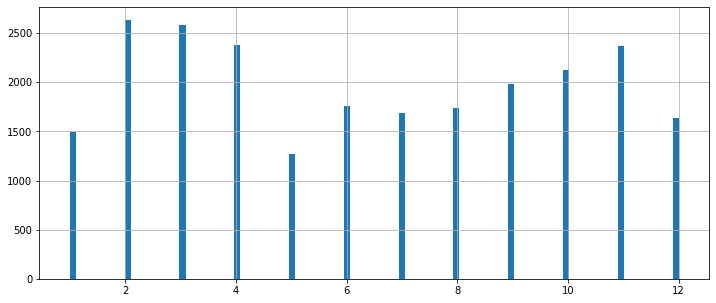

In [119]:
#Выведем данные по столбцу 'fde_month'
print(data['fde_month'].describe())

data['fde_month'].hist(bins=100, figsize = (12,5))
plt.show()

**Вывод по столбцу 'fde_month':** наибольшая активность пользователей при публикации объявлений приходится на весну и осень

#### Анализ столбца `days_exposition`

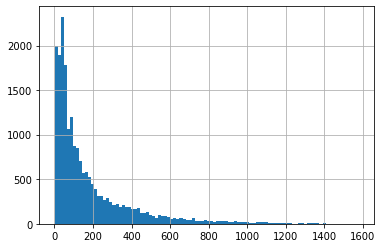

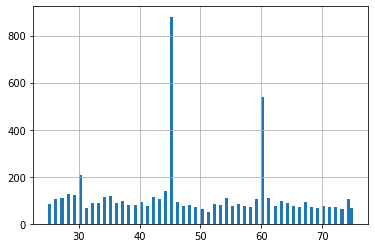

95.0
180.8797774198272
count    20487.000000
mean       180.879777
std        219.761008
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [120]:
data['days_exposition'].hist(bins = 100)
plt.show()

data['days_exposition'].hist(bins = 100, range = (25, 75))
plt.show()

print(data['days_exposition'].median())
print(data['days_exposition'].mean())

print(data['days_exposition'].describe())


(-10.0, 600.0)

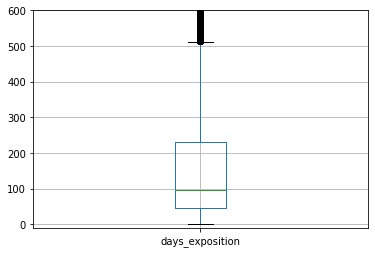

In [121]:
data.boxplot('days_exposition')
plt.ylim(-10, 600)

**Выводы по столбцу `days_exposition`:** 
- Сколько времени обычно занимает продажа - от 45 до 230 дней. 
- Какие продажи можно считать быстрыми - те, которые завершились ранее 30 дней
- Какие продажи можно считать необычно долгими - те, которые завершились позднее 500 дней
- Есть два пика на значениях 45 и 60 дней, также небольшой пи на 30 днях. Скорее всего это срок размещения объявления.

#### Факторы, влияющие на общую (полную) стоимость объекта. Анализ

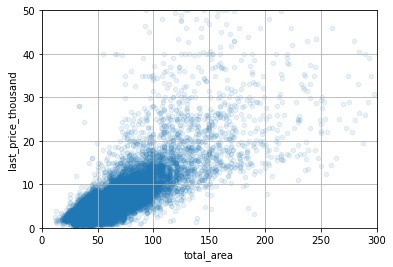

0.6529440540254229


In [122]:
#Рассмотрим зависимость цены от общей площади
data.sort_values('total_area').plot(x='total_area', y = 'last_price_thousand', kind = 'scatter', alpha = 0.1, grid = True)
plt.xlim(0, 300)
plt.ylim(0, 50)
plt.show()

print(data['last_price_thousand'].corr(data['total_area']))

**Выводы по графику**: Видим, что цена зависит от общей плоащди квартиры. При этом видна положительная корреляция. (т.е. увеличение плоащди ведет к увеличению стоимости). также стоит отметить, что после 120 кв.м. зависимость ослабевает.

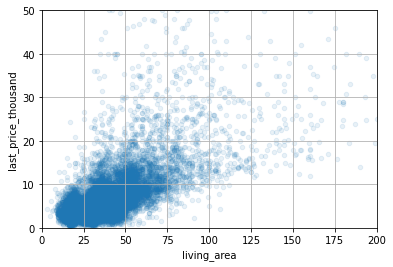

0.5652132355882912


In [123]:
#Рассмотрим зависимость цены от жилой площади
data.sort_values('living_area').plot(x='living_area', y = 'last_price_thousand', kind = 'scatter', alpha = 0.1, grid = True)
plt.xlim(0, 200)
plt.ylim(0, 50)
plt.show()

print(data['last_price_thousand'].corr(data['living_area']))

**Выводы по графику**: Видим, что цена зависит от жилой плоащди квартиры. При этом видна положительная корреляция. (т.е. увеличение плоащди ведет к увеличению стоимости). также стоит отметить, что после 60 кв.м. зависимость ослабевает.

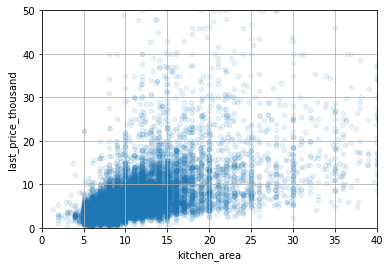

0.5210752351695865


In [124]:
#Рассмотрим зависимость цены от площади кухни
data.sort_values('kitchen_area').plot(x='kitchen_area', y = 'last_price_thousand', kind = 'scatter', alpha = 0.1, grid = True)
plt.xlim(0, 40)
plt.ylim(0, 50)
plt.show()

print(data['last_price_thousand'].corr(data['kitchen_area']))

**Выводы по графику**: Видим, что цена зависит от плоащди кухни, но уже в меньшей степени чем предыдущие показатели. При этом видна положительная корреляция. (т.е. увеличение плоащди ведет к увеличению стоимости). также стоит отметить, что после 15 кв.м. зависимость ослабевает.

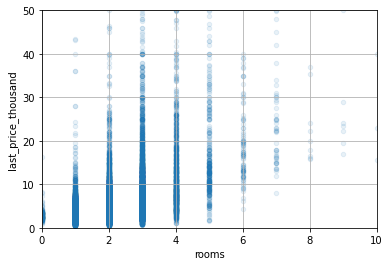

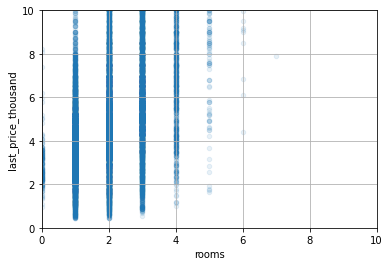

0.3626615787394337


In [125]:
#Рассмотрим зависимость цены от количества комнат
data.sort_values('rooms').plot(x='rooms', y = 'last_price_thousand', kind = 'scatter', alpha = 0.1, grid = True)
plt.xlim(0, 10)
plt.ylim(0, 50)
plt.show()

data.sort_values('rooms').plot(x='rooms', y = 'last_price_thousand', kind = 'scatter', alpha = 0.1, grid = True)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

print(data['last_price_thousand'].corr(data['rooms']))

**Выводы по графику**: Видим, что цена зависит от количества комнат. 1-4 комантные квартиры наиболее популярные в диапазоне цен до 10 млн. руб. 

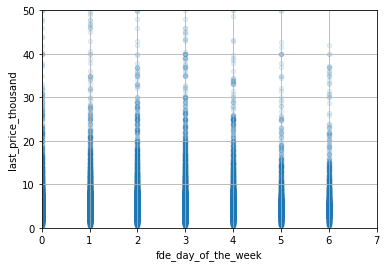

0.0021072841702753893


In [126]:
#Рассмотрим зависимость цены от дня недели (0-понедельник)
data.sort_values('fde_day_of_the_week').plot(x='fde_day_of_the_week', y = 'last_price_thousand', kind = 'scatter', alpha = 0.1, grid = True)
plt.xlim(0, 7)
plt.ylim(0, 50)
plt.show()

print(data['last_price_thousand'].corr(data['fde_day_of_the_week']))

**Выводы по графику**: Зависмость от дня недели очень маленькая 

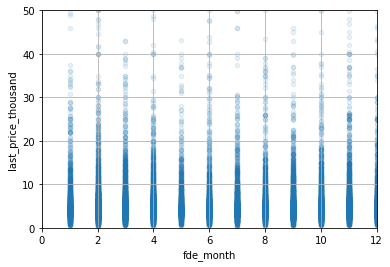

0.002835003123621482


In [127]:
#Рассмотрим зависимость цены от месяца
data.sort_values('living_area').plot(x='fde_month', y = 'last_price_thousand', kind = 'scatter', alpha = 0.1, grid = True)
plt.xlim(0, 12)
plt.ylim(0, 50)
plt.show()

print(data['last_price_thousand'].corr(data['fde_month']))

**Выводы по графику**: Есть небольшая зависимость от сезона, но не ярко выражена.

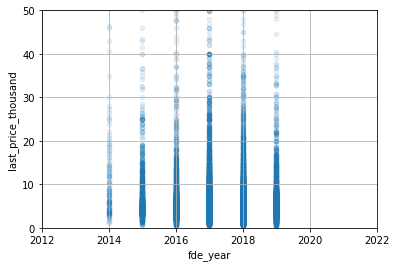

-0.04198914317332477


In [128]:
#Рассмотрим зависимость цены от года
data.sort_values('living_area').plot(x='fde_year', y = 'last_price_thousand', kind = 'scatter', alpha = 0.1, grid = True)
plt.xlim(2012, 2022)
plt.ylim(0, 50)
plt.show()

print(data['last_price_thousand'].corr(data['fde_year']))

**Выводы по графику:** Зависимость цены от года пцбликации практически отсутствует

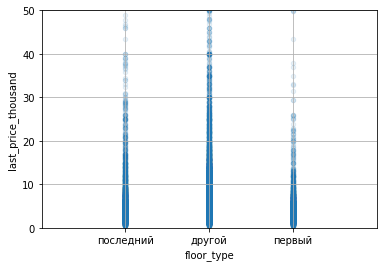

0.026685054220534733


In [129]:
#Рассмотрим зависимость цены от типа этажа
data.sort_values('living_area').plot(x='floor_type', y = 'last_price_thousand', kind = 'scatter', alpha = 0.1, grid = True)
plt.xlim(-1, 3)
plt.ylim(0, 50)
plt.show()

print(data['last_price_thousand'].corr(data['floor']))

**Выводы по графику:** Первый этаж имеет наименьшую стоимость.

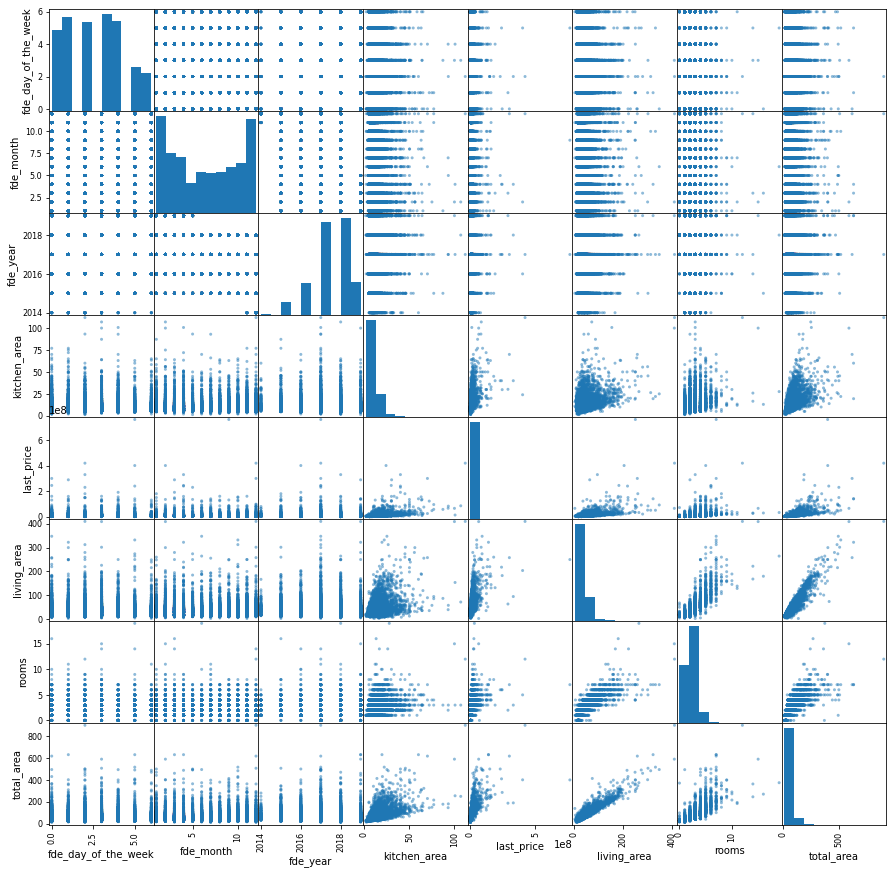

In [130]:
#Рассмотрим взаимозависимость разных факторов между собой
last_price_dependency = data.pivot_table(index = data.index, values = ['last_price', 'total_area', 'living_area',  'kitchen_area', 'rooms', 'floor_type','fde_day_of_the_week', 'fde_month', 'fde_year'])
pd.plotting.scatter_matrix(last_price_dependency, figsize = (15, 15))
plt.show()

In [131]:
#Рассмотрим цифры корреляции показателей. В частности строка - `last_price`
last_price_dependency.corr()

,fde_day_of_the_week,fde_month,fde_year,kitchen_area,last_price,living_area,rooms,total_area
fde_day_of_the_week,1.000000,0.011093,-0.004379,-0.008521,0.002107,-0.005495,-0.004256,-0.004570
fde_month,0.011093,1.000000,-0.269355,0.002405,0.002835,-0.002601,-0.004411,0.005434
fde_year,-0.004379,-0.269355,1.000000,-0.054585,-0.041989,-0.072295,-0.054834,-0.078696
kitchen_area,-0.008521,0.002405,-0.054585,1.000000,0.521075,0.428448,0.269728,0.609136
last_price,0.002107,0.002835,-0.041989,0.521075,1.000000,0.565213,0.362662,0.652944
living_area,-0.005495,-0.002601,-0.072295,0.428448,0.565213,1.000000,0.846160,0.939480
rooms,-0.004256,-0.004411,-0.054834,0.269728,0.362662,0.846160,1.000000,0.758705
total_area,-0.004570,0.005434,-0.078696,0.609136,0.652944,0.939480,0.758705,1.000000


**Вывод по взаимосвязям:** Цена наиболее коррлирует с обшей площадью, жилой площадью, , площадью кухни, количеством комнат. Примечательно что сезон не влияет на цену.

In [132]:
#создаем список из топ 10 населенных пунктов по количеству объявлений
top_ten_locality_names = list(data['locality_name'].value_counts().head(10).index)

#создаем массив с данными по средней цене
data_for_mean = pd.DataFrame(data.groupby('locality_name')['price_per_sq_metr'].mean())

#оставим только те значения, которые входят в список top_ten_locality_names методом query 
data_for_mean.query('locality_name == @top_ten_locality_names').sort_values('price_per_sq_metr', ascending = False)

,price_per_sq_metr
locality_name,
Санкт-Петербург,114776.399063
Пушкин,103125.819377
Кудрово,95324.930508
Парголово,90175.913089
Мурино,86038.859455
Шушары,78677.364318
Колпино,75424.579112
Гатчина,68757.678399
Всеволожск,68654.473970


In [133]:
#населённые пункты с самой высокой стоимостью квадратного метра
data.groupby(by = 'locality_name')['price_per_sq_metr'].max().sort_values(ascending = False).head(10)

locality_name
Санкт-Петербург    1907500.00
Всеволожск          640422.35
Зеленогорск         323943.66
Пушкин              256521.74
Петергоф            225971.73
СПб или ЛО          196648.04
Сестрорецк          182688.17
Репино              175000.00
Лисий Нос           168706.70
Павловск            161428.57
Name: price_per_sq_metr, dtype: float64

In [134]:
#населённые пункты с самой низкой стоимостью квадратного метра
data.groupby(by = 'locality_name')['price_per_sq_metr'].max().sort_values(ascending = True).head(10)

locality_name
Вахнова Кара       11688.31
Старополье         12250.00
Совхозный          12702.70
Малая Романовка    12724.55
Тёсово-4           12931.03
Выскатка           13207.55
Сижно              13709.68
Лужайка            15000.00
Свирь              15000.00
Ям-Тесово          15094.34
Name: price_per_sq_metr, dtype: float64

#### Задача: Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [135]:
#Создадим набор данных и сгруппируем по столбцу - расстояние в квадратных местрах. Высчитаем медиану по цене

to_center_km_data = data[data['locality_name'] == 'Санкт-Петербург'].groupby('to_center_km')['last_price_thousand'].median()

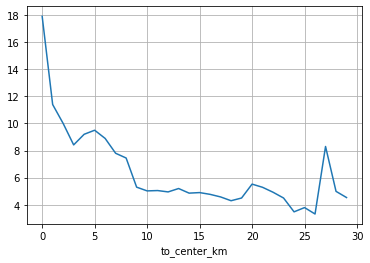

In [136]:
# Построим график зависимости стоимости от километража от центра
to_center_km_data.plot(x='to_center_km', y ='last_price_thousand', grid = True)
plt.show()

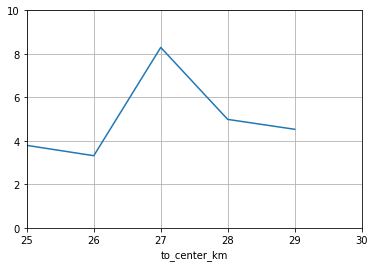

In [137]:
# Посмотрим более детально  всплеск
to_center_km_data.plot(x='to_center_km', y ='last_price_thousand', grid = True)
plt.xlim(25, 30)
plt.ylim(0, 10)
plt.show()

In [138]:
data['locality_name'][data['to_center_km'].isin([27])].unique()


array(['Пушкин', 'Металлострой', 'Санкт-Петербург', 'Петро-Славянка',
       'Александровская', 'Красное Село'], dtype=object)

**Вывод:** цена повышается при нахождении объекта ближе к центру Санкт-петербурга. Также есть шесть населенных пунктов, где цена высокая несмотря на отдаленность от города: 'Пушкин', 'Металлострой', 'Санкт-Петербург', 'Петро-Славянка', 'Александровская', 'Красное Село'

### Общий вывод

**Этапы проведенного исследования**:
- Обработаны все данные на предмет наличия пропусков, дубликатов, аномальных значений, технических ошибок,
- Данные дополнены вспомогательными столбцами для удобства представления информации
- Проведен анализ данных графическими и статистическими методами
- Проведен анализ зависимости цены от различных факторов
- Рассчитана стоимость 1 кв.м. ТОП-10 локаций по количеству объявлений
- Графически представлена зависимость цены квартир, находящися в СПБ от расстояния до центра

**Вывод**

Данные содержат информцию об объектах недвжимости на основании объявлений. 
Данные содержат 23 700 значений. 
Данные за 2014-2019 годы. 
Данные по Санкт-Петербургу и ЛО. (66% объявлений относятся к Санкт-Петрбургу. Также выделены пригороды СПБ и населенные пункты Ленинградской области, составляющие в общем 34% данных). 
Стоит выделить три населенных пунтка вне города, где цена стремится к городсой - это 'Зеленогорск', 'Репино', 'Сестрорецк' - пригороды - курорты. 

СПБ
Средняя стоиомотсь квартиры составляет: 5,5 млн.
Средняя плоащдь квартиры составляет: 55 кв.м.

ЛО
Средняя стоиомтсь квартиры составляет: 3,2 млн.
Средняя плоащдь квартиры составляет: 47 кв.м.


Стоимость объекта наиболее зависима от его площади и наименее зависима от даты публикации.